# Analysis of Evaluation Data

## Load Data

In [1]:
import json
import os
import matplotlib.pyplot as plt

In [2]:
def load_data(data_dir):
    json_data = []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.json'):
                with open(os.path.join(root, file), 'r') as fp:
                    dd = json.load(fp)
                    json_data.append(dd)
    return json_data

In [3]:
DATA_DIR_DEFAULT = '2022-02-02_bigFlows-default'
DATA_DIR_M1 = '2022-02-02_bigFlows-m1'
json_data_default = load_data(DATA_DIR_DEFAULT)
json_data_m1 = load_data(DATA_DIR_M1)

## Compute Time Deltas

In [4]:
deltas_default = []
for json_obj in json_data_default:
    t0 = json_obj['timestampBeforeMiningFirstFlowPacket']
    t1 = json_obj['timestampBeforeEmittingToSocketBroadcaster']
    deltas_default.append(t1-t0)

deltas_m1 = []
for json_obj in json_data_m1:
    t0 = json_obj['timestampBeforeMiningFirstFlowPacket']
    t1 = json_obj['timestampBeforeEmittingToSocketBroadcaster']
    deltas_m1.append(t1-t0)


## Visualization

### Softflowd Default Configuration

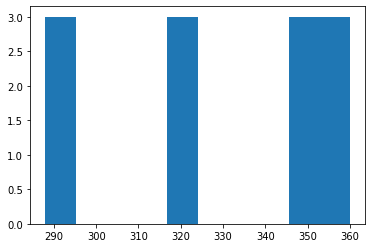

In [5]:
plt.hist(deltas_default)
plt.show()

### Softflowd -m 1 Configuration

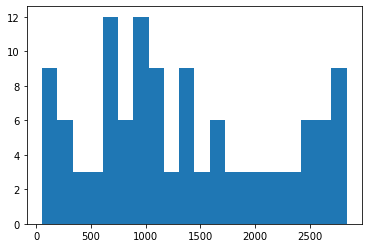

In [6]:
plt.hist(deltas_m1, bins=20)
plt.show()